<a href="https://colab.research.google.com/github/varuncode01/ST_Project3/blob/main/ML_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Name**  - Varun Pal

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile_Price_Prediction_Project2/data_mobile_price_range.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.value_counts()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram   sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
1989           1     2.9          1         8   0       17          0.1    193        8        15  629        682       2369  7     0     18         1        1             0     2              1
               0     2.5          1         0   1       41          0.8    94         3        13  1100       1497      1665  17    9     12         1        1             1     2              1
1988           1     0.5          0         0   1       16          0.1    94         8        1   153        696       3144  16    2     14         1        0             0     3              1
1987           1     1.9          0         0   0       50          0.7    119        8        18  960        1925      857   12    4     6          1        1             0     1              1
                     0.5          0         3   1       53          1.0    181        3        7   1052       1516      3117  18    5     8          1        1             1     3              1
                                                                                                                                                                                                ..
503            0     1.2          1         5   1       8           0.4    111        3        13  201        1245      2583  11    0     12         1        0             0     1              1
502            0     1.5          1         7   0       37          0.2    199        2        12  705        1810      1649  6     1     14         0        1             0     1              1
                     0.8          0         7   0       52          1.0    82         6        8   281        1159      2666  5     4     20         1        1             0     2              1
501            1     0.5          1         14  0       22          0.5    174        6        20  239        1636      3077  17    3     17         0        0             0     2              1
               0     2.3          0         12  1       54          0.3    131        4        19  504        1089      2346  13    12    2          1        0             1     1              1
Name: count, Length: 2000, dtype: int64

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


<Axes: >

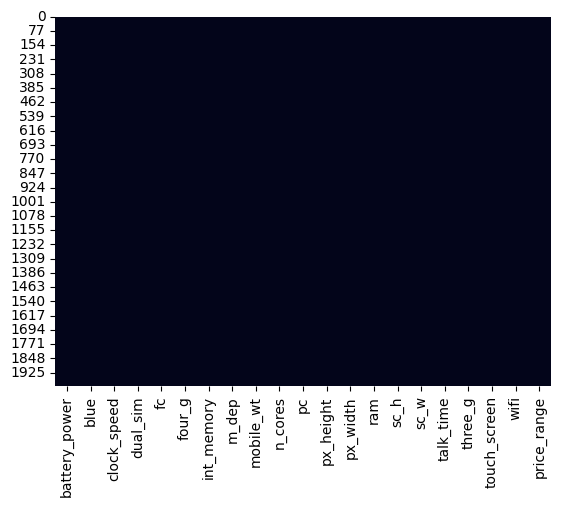

In [11]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

Currently there are no null values in dataset

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

Input Columns (Features):

* battery_power:
Battery capacity of the mobile (in mAh).

* blue:
Indicates whether the phone has Bluetooth support.
0: No
1: Yes

* clock_speed:
Clock speed of the CPU (in GHz).

* dual_sim:
Indicates if the phone supports dual SIMs.
0: No
1: Yes

* fc (front camera):
Front camera megapixels.

* four_g:
Indicates whether the phone supports 4G.
0: No
1: Yes

* int_memory:
Internal memory of the phone (in GB).

* m_dep (mobile depth):
Thickness of the phone (in cm).

* mobile_wt:
Weight of the mobile phone (in grams).

* n_cores:
Number of cores in the processor.

* pc (primary camera):
Rear camera megapixels.

* px_height:
Height resolution of the screen (in pixels).

* px_width:
Width resolution of the screen (in pixels).

* ram:
Random Access Memory (in MB).

* sc_h (screen height):
Height of the screen (in cm).

* sc_w (screen width):
Width of the screen (in cm).

* talk_time:
Battery backup time (in hours) while talking.

* three_g:
Indicates whether the phone supports 3G.
0: No
1: Yes

* touch_screen:
Indicates if the phone has a touchscreen.
0: No
1: Yes

* wifi:
Indicates whether the phone supports Wi-Fi.
0: No
1: Yes



Output Column:

price_range:
The target variable indicating the price category of the mobile.
Usually encoded as:
0: Low cost
1: Medium cost
2: High cost
3: Very high cost

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [65]:
def show_correlation_between_columns(df4, columns):
    """
    Display a correlation matrix and heatmap for the specified columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The dataset
    columns (list): List of column names (strings) to analyze
    """
    # Validate columns
    missing_cols = [col for col in columns if col not in df.columns]
    if missing_cols:
        print(f"The following columns are not in the DataFrame: {missing_cols}")
        return

    # Calculate correlation matrix
    corr_matrix = df[columns].corr()

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

In [55]:
def scatter_plot_columns(df4, columns, target_column='price_range'):
    """
    Generate scatter plots for multiple columns against a target column.

    Parameters:
    df (pd.DataFrame): The dataset
    columns (list): List of feature column names to plot against the target
    target_column (str): The target column for the y-axis (default: 'price_range')
    """
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in DataFrame.")
        return

    for col in columns:
        if col not in df.columns:
            print(f"Column '{col}' not found in DataFrame.")
            continue

        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y=target_column, alpha=0.3)
        plt.title(f"{col} vs {target_column}")
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.tight_layout()
        plt.show()

In [56]:
def show_correlation_with_price_category(df, column_name):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return

    # Compute correlation
    correlation = df[[column_name, 'Category']].corr().iloc[0, 1]
    print(f"Correlation between '{column_name}' and 'price_range': {correlation:.4f}")

    # Plot scatterplot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column_name, y='price_range', alpha=0.3)
    plt.title(f"Scatter Plot: {column_name} vs price_range")
    plt.xlabel(column_name)
    plt.ylabel('price_range')
    plt.tight_layout()
    plt.show()

In [71]:
def combine_columns(df4, columns, new_column_name, method):
    """
    Combine multiple columns into one using a specified method: 'add', 'multiply', or 'concat'.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to combine.
    new_column_name (str): Name of the new combined column.
    method (str): Method to combine columns: 'add', 'multiply', or 'concat'.
    """
    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    if method == 'add':
        df[new_column_name] = df[columns].sum(axis=1)
    elif method == 'multiply':
        import operator
        from functools import reduce
        df[new_column_name] = reduce(operator.mul, (df[col] for col in columns))
    elif method == 'concat':
        df[new_column_name] = df[columns].astype(str).agg('_'.join, axis=1)
    else:
        raise ValueError("Method must be 'add', 'multiply', or 'concat'.")

    print(f"Created new column '{new_column_name}' using method '{method}'")
    return df

In [85]:
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(df, feature_cols, target='price_range'):
    """
    Plots how much each feature in feature_cols impacts the target using ANOVA F-test.

    Parameters:
    - df: DataFrame
    - feature_cols: List of columns to test
    - target: Target column, default is 'price_range'
    """
    f_scores = []
    p_values = []

    for col in feature_cols:
        if df[col].dtype == 'object':
            X = pd.get_dummies(df[[col]], drop_first=True)
        else:
            X = df[[col]]
        y = df[target]

        F, p = f_classif(X, y)
        f_scores.append(F[0])
        p_values.append(p[0])

    results_df = pd.DataFrame({
        'Feature': feature_cols,
        'F_score': f_scores,
        'p_value': p_values
    }).sort_values(by='F_score', ascending=False)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df, x='F_score', y='Feature', palette='viridis')
    plt.title('Feature Impact on Price Range (ANOVA F-score)')
    plt.xlabel('F-score (Higher = More Impact)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return results_df


#### Chart - 1

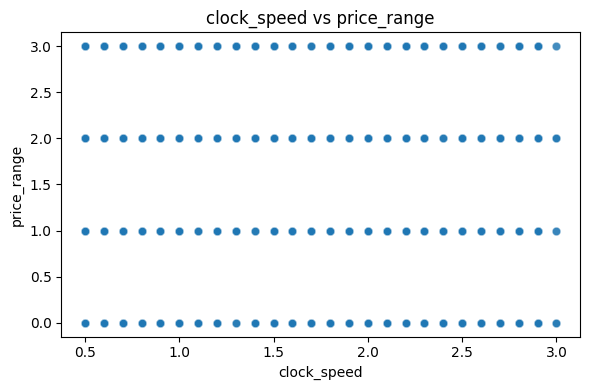

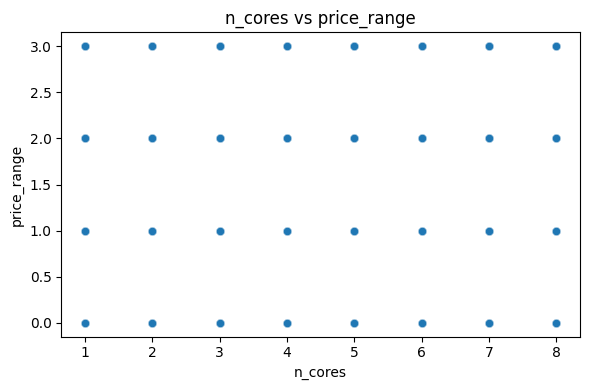

In [93]:
# Chart - 1 visualization code

chart1 = ['clock_speed', 'n_cores']

scatter_plot_columns(df, chart1)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

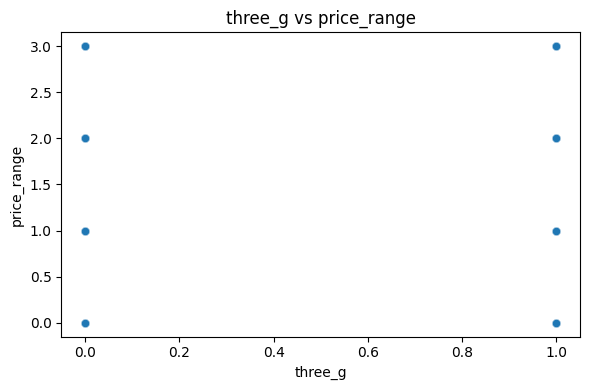

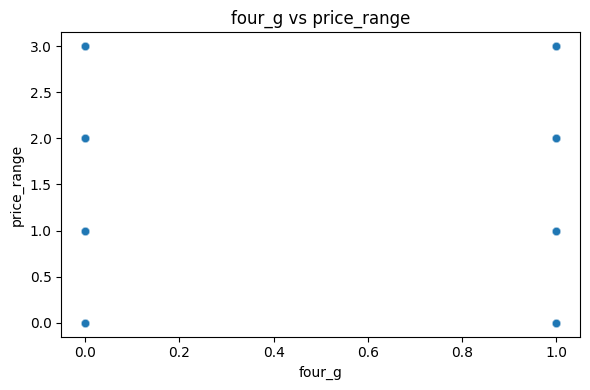

In [91]:
# Chart - 2 visualization code
chart2 = ['three_g', 'four_g']

scatter_plot_columns(df, chart2)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

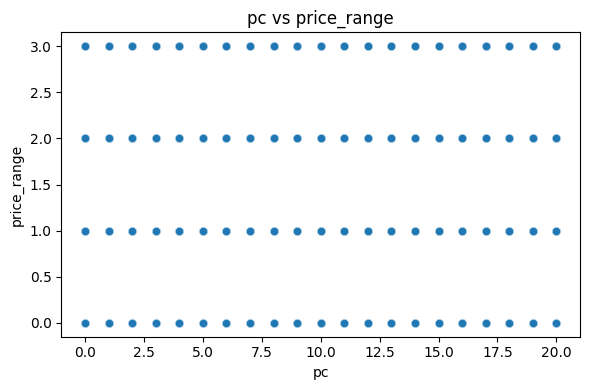

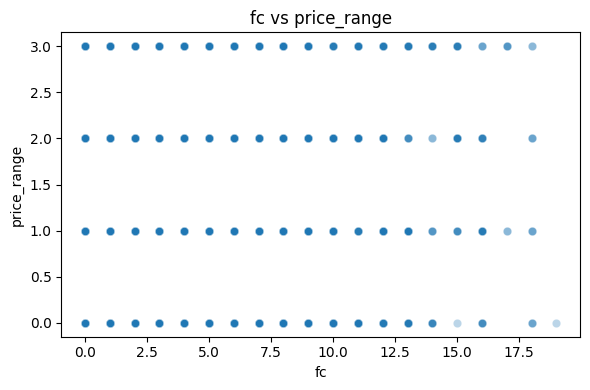

In [92]:
# Chart - 3 visualization code
chart3 = ['pc', 'fc']

scatter_plot_columns(df, chart3)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

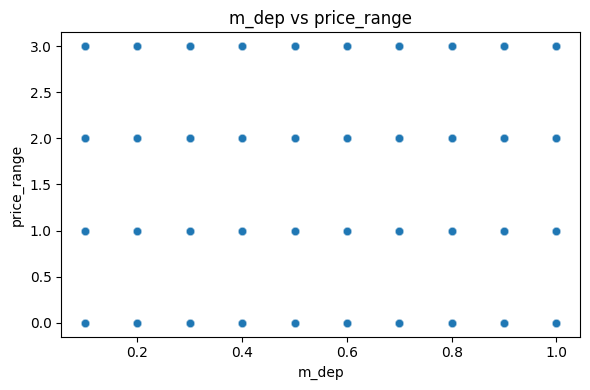

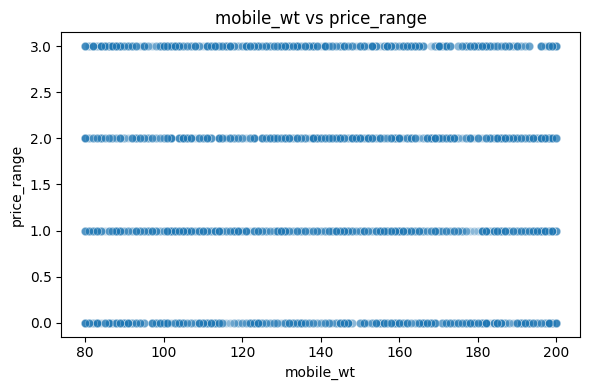

In [94]:
# Chart - 4 visualization code
chart4 = ['m_dep', 'mobile_wt']

scatter_plot_columns(df, chart4)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [23]:
# Chart - 5 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [24]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [25]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [26]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [27]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [28]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [29]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [30]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [31]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

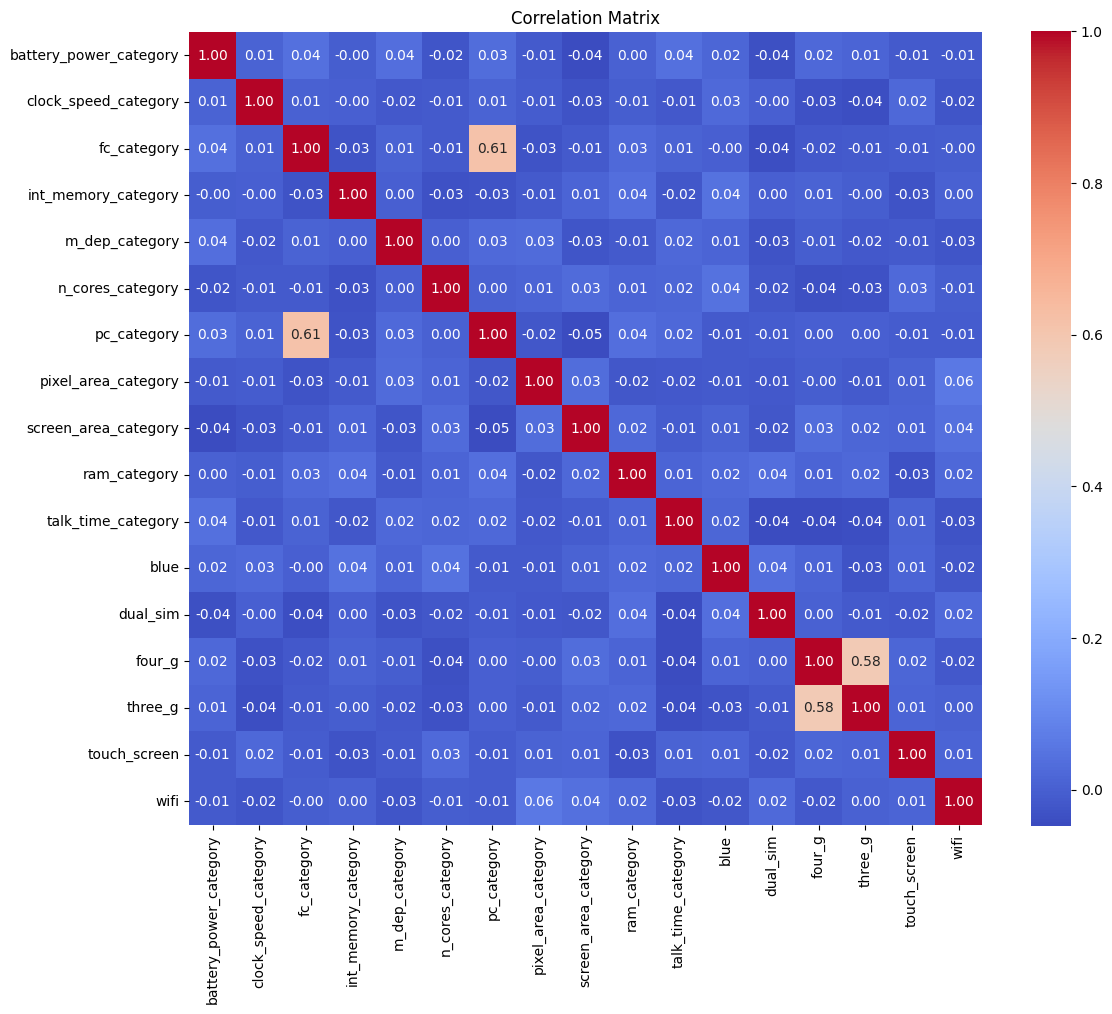

In [66]:
# Correlation Heatmap visualization code
columns_to_check = ['battery_power_category', 'clock_speed_category', 'fc_category',
       'int_memory_category', 'm_dep_category', 'n_cores_category',
       'pc_category', 'pixel_area_category', 'screen_area_category',
       'ram_category', 'talk_time_category', 'blue', 'dual_sim', 'four_g',
       'three_g', 'touch_screen', 'wifi']

show_correlation_between_columns(df, columns_to_check)

In [57]:
df4.columns

Index(['battery_power_category', 'clock_speed_category', 'fc_category',
       'int_memory_category', 'm_dep_category', 'n_cores_category',
       'pc_category', 'pixel_area_category', 'screen_area_category',
       'ram_category', 'talk_time_category', 'blue', 'dual_sim', 'four_g',
       'three_g', 'touch_screen', 'wifi'],
      dtype='object')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

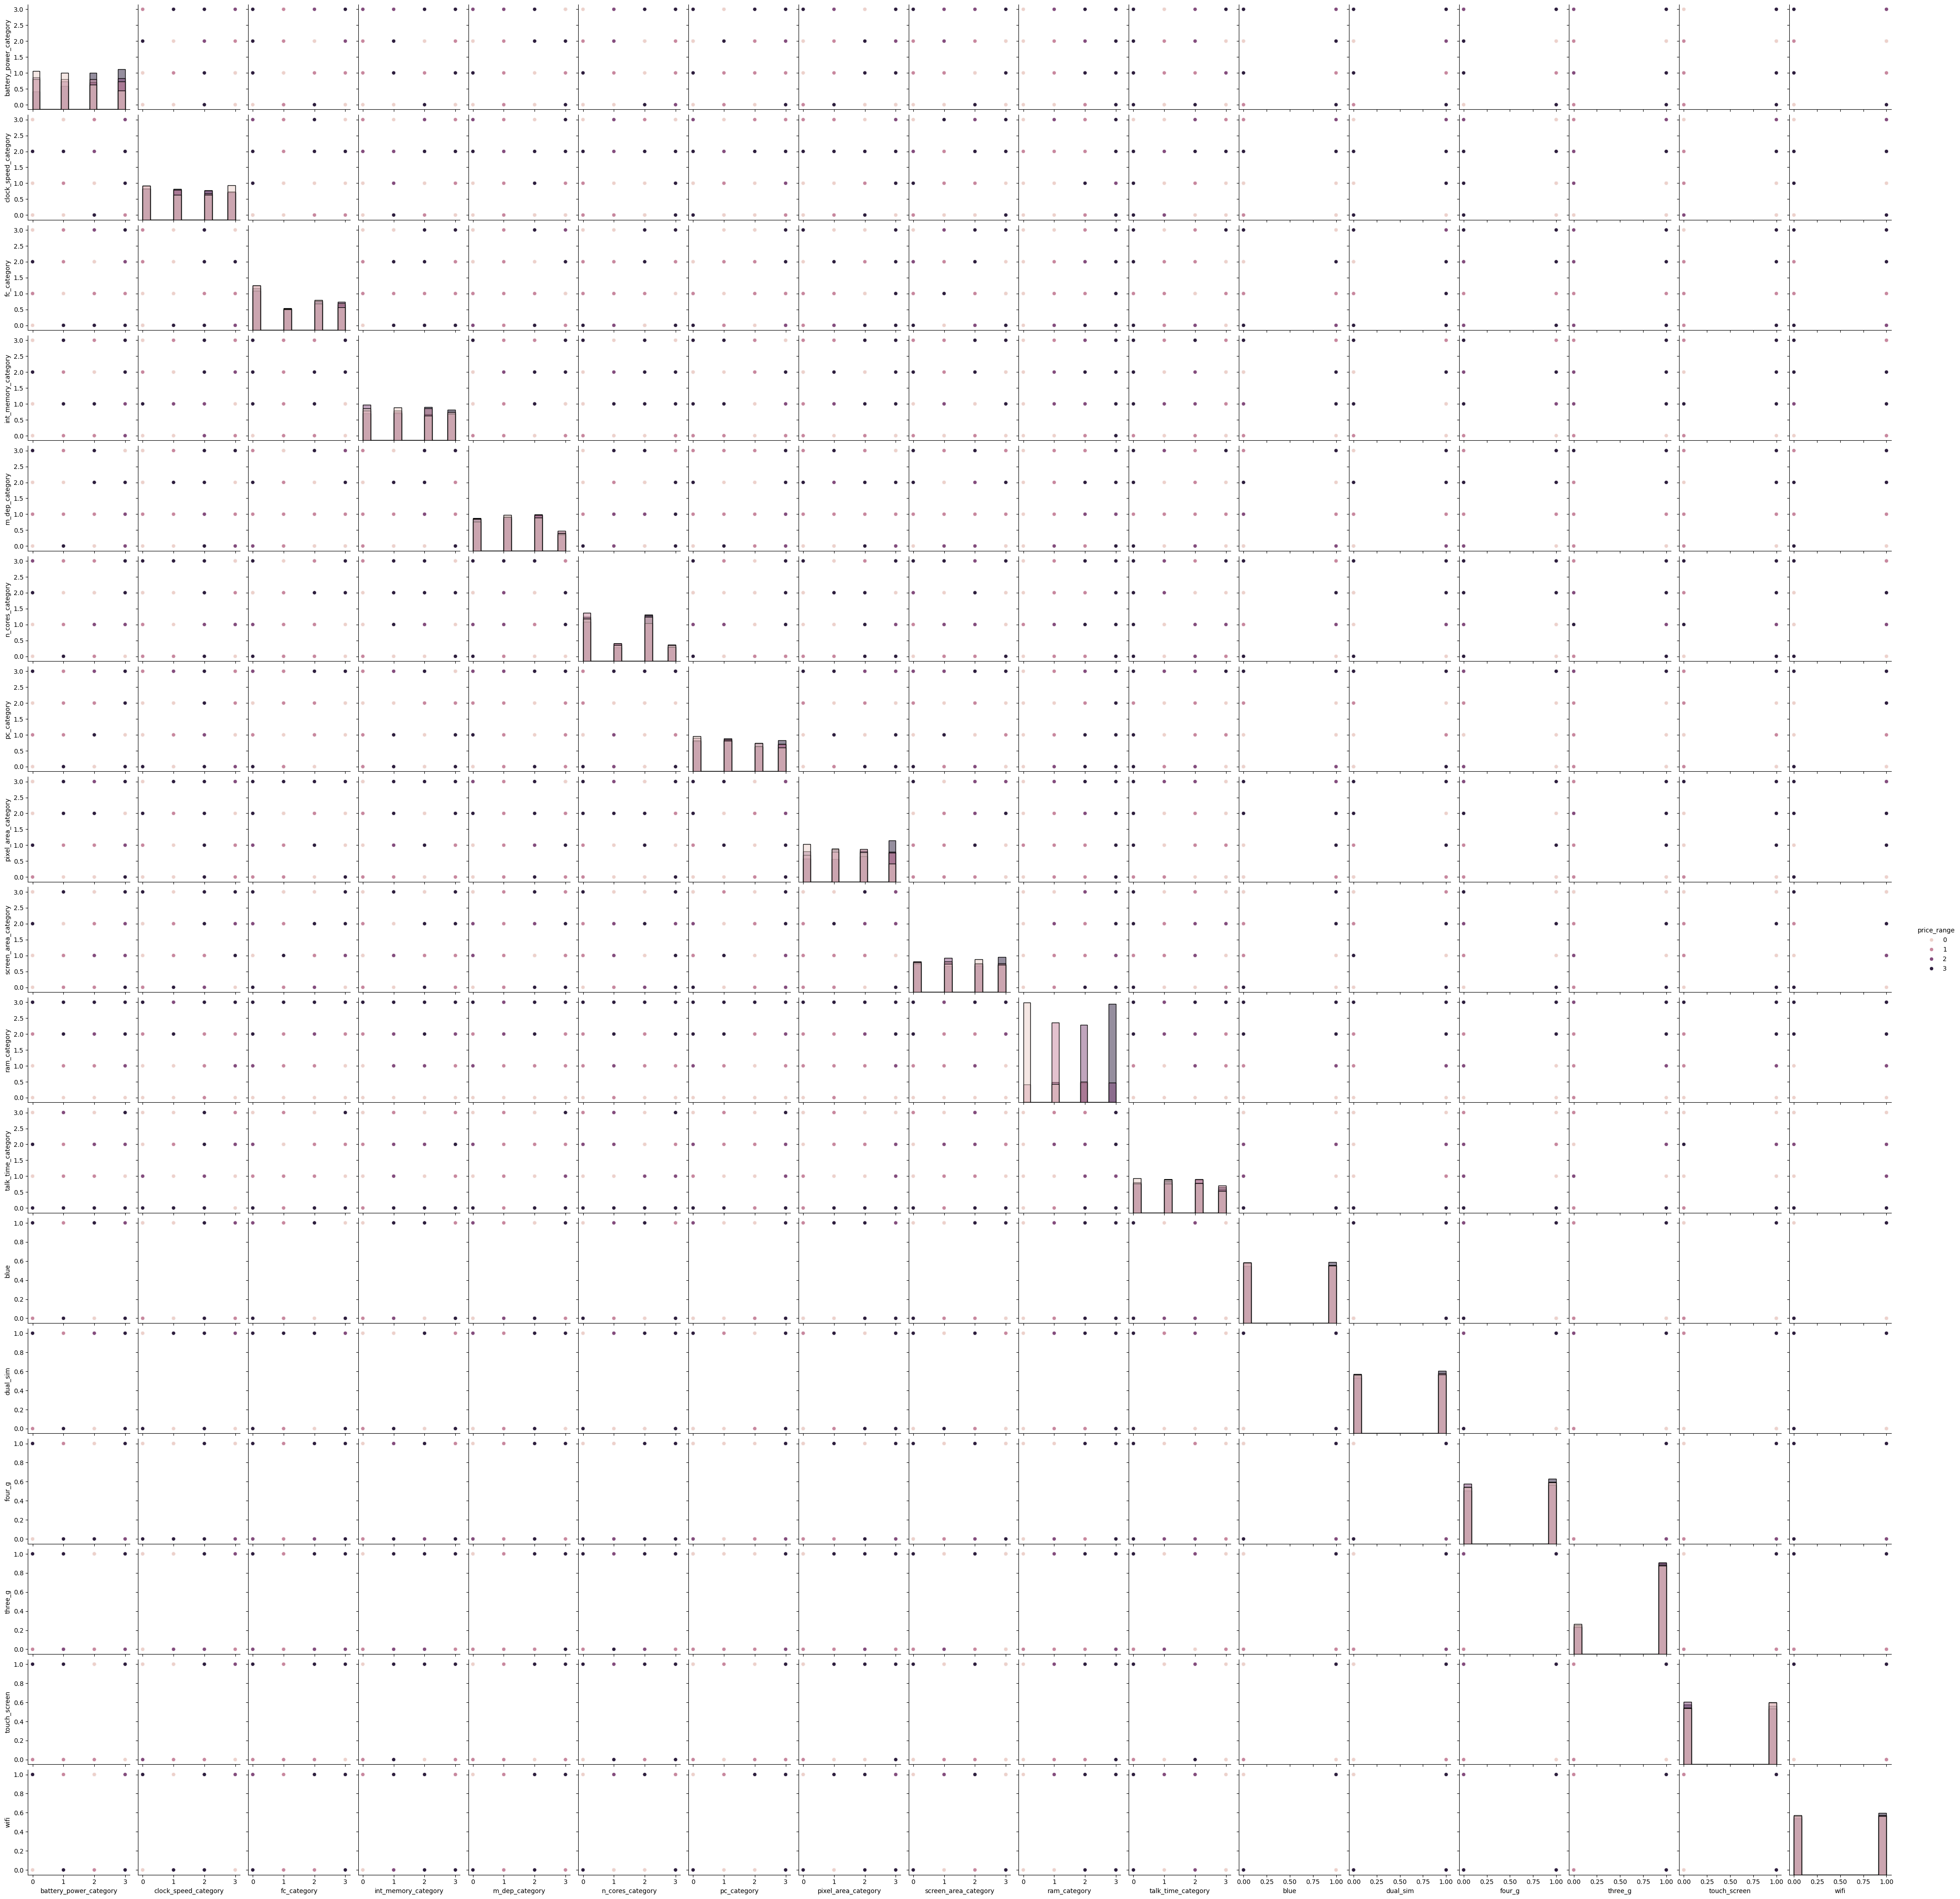

In [84]:
# Pair Plot visualization code
# Select the key columns from the original DataFrame
key_columns = ['battery_power_category', 'clock_speed_category', 'fc_category',
       'int_memory_category', 'm_dep_category', 'n_cores_category',
       'pc_category', 'pixel_area_category', 'screen_area_category',
       'ram_category', 'talk_time_category', 'blue', 'dual_sim', 'four_g',
       'three_g', 'touch_screen', 'wifi']


sns.pairplot(df4[key_columns + ['price_range']], hue='price_range', diag_kind='hist')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [42]:
import plotly.express as px


def check_outliers(columns,data):

  # use plotly for better plot
  for i in columns:
    fig = px.box(data,y=i)
    fig.update_layout(height=600, width=800)
    fig.show()



In [43]:

columns1 = [['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'n_cores', 'pc', 'pixel_area',	'screen_area', 'ram', 'talk_time']]
check_outliers(columns1, df)

In [44]:
# Handling Outliers & Outlier treatments
def outliers_removal(cols_to_check):
  Q1 = df[cols_to_check].quantile(0.25)
  Q3 = df[cols_to_check].quantile(0.75)
  IQR = Q3 - Q1

  # Identify outliers in only these columns
  outlier_mask = (df[cols_to_check] < (Q1 - 1.5 * IQR)) | (df[cols_to_check] > (Q3 + 1.5 * IQR))

   # Filter out rows with outliers in either of the two columns
  df_cleaned = df[~outlier_mask.any(axis=1)]

  # Boxplot before outlier removal
  df_before = df[cols_to_check].melt(var_name='variable', value_name='value')
  plt.figure(figsize=(8, 5))
  sns.boxplot(x='variable', y='value', data=df_before)
  plt.title("Before Outlier Removal (C Variables Only)")
  plt.tight_layout()
  plt.show()

  # Boxplot after outlier removal
  df_after = df_cleaned[cols_to_check].melt(var_name='variable', value_name='value')
  plt.figure(figsize=(8, 5))
  sns.boxplot(x='variable', y='value', data=df_after)
  plt.title("After Outlier Removal (C Variables Only)")
  plt.tight_layout()
  plt.show()

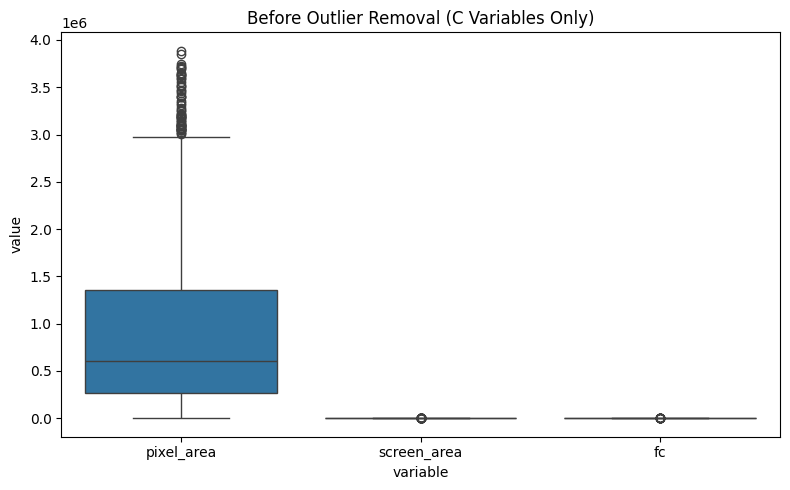

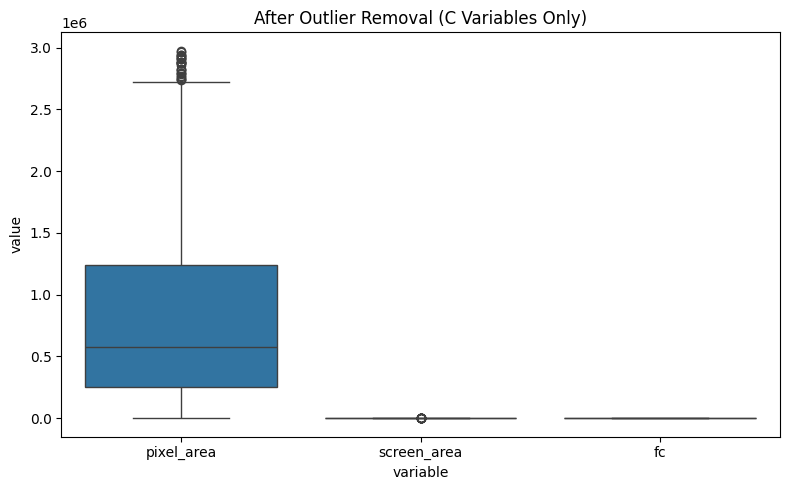

In [45]:
# Handling Outliers & Outlier treatments
cols_to_check = ['pixel_area',	'screen_area', 'fc']
outliers_removal(cols_to_check)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns

def category_in_column(columns,data):

  # use plotly for better plot
  for i in columns:
    df[i + "_category"] = pd.qcut(df[i], q=4, labels=False, duplicates='drop')



In [47]:
columns2 = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'n_cores', 'pc', 'pixel_area',	'screen_area', 'ram', 'talk_time']
category_in_column(columns2, df)

In [48]:
df2 = df.iloc[:, 23:]
df2.head(10)

,battery_power_category,clock_speed_category,fc_category,int_memory_category,m_dep_category,n_cores_category,pc_category,pixel_area_category,screen_area_category,ram_category,talk_time_category
0,0,2,0,0,2,0,0,0,2,2,3
1,1,0,0,3,2,0,1,3,1,2,1
2,0,0,1,2,3,2,1,3,1,2,1
3,0,3,0,0,2,2,1,3,3,2,1
4,3,1,3,2,2,0,2,3,0,1,2
5,3,0,1,1,2,0,1,3,0,0,1
6,3,2,2,0,2,3,1,1,2,3,3
7,3,0,0,1,2,1,0,1,1,0,0
8,2,0,0,3,2,2,2,1,0,0,3
9,0,0,1,0,0,2,2,3,3,0,2


In [49]:
df3 = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
df3.head(10)

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
5,0,1,0,1,0,0
6,0,0,1,1,0,1
7,0,1,0,1,1,1
8,1,0,0,1,0,0
9,1,1,1,1,0,0


In [79]:
df4 = pd.concat([df2, df3], axis=1)
df4['price_range'] = df['price_range']
df4.head(10)

,battery_power_category,clock_speed_category,fc_category,int_memory_category,m_dep_category,n_cores_category,pc_category,pixel_area_category,screen_area_category,ram_category,talk_time_category,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,2,0,0,2,0,0,0,2,2,3,0,0,0,0,0,1,1
1,1,0,0,3,2,0,1,3,1,2,1,1,1,1,1,1,0,2
2,0,0,1,2,3,2,1,3,1,2,1,1,1,1,1,1,0,2
3,0,3,0,0,2,2,1,3,3,2,1,1,0,0,1,0,0,2
4,3,1,3,2,2,0,2,3,0,1,2,1,0,1,1,1,0,1
5,3,0,1,1,2,0,1,3,0,0,1,0,1,0,1,0,0,1
6,3,2,2,0,2,3,1,1,2,3,3,0,0,1,1,0,1,3
7,3,0,0,1,2,1,0,1,1,0,0,0,1,0,1,1,1,0
8,2,0,0,3,2,2,2,1,0,0,3,1,0,0,1,0,0,0
9,0,0,1,0,0,2,2,3,3,0,2,1,1,1,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [39]:
# Manipulate Features to minimize feature correlation and create new features

df["pixel_area"] = df["px_height"] * df["px_width"]
df["screen_area"] = df["sc_h"] * df["sc_w"]

#### 2. Feature Selection

In [41]:
# Select your features wisely to avoid overfitting
df[["pixel_area", "screen_area"]]

,pixel_area,screen_area
0,15120,63
1,1799140,51
2,2167308,22
3,2171776,128
4,1464096,16
...,...,...
1995,2309580,52
1996,1797975,110
1997,1416576,9
1998,225120,180


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [51]:
# Transform Your data\
df.head(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,clock_speed_category,fc_category,int_memory_category,m_dep_category,n_cores_category,pc_category,pixel_area_category,screen_area_category,ram_category,talk_time_category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2,0,0,2,0,0,0,2,2,3
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,0,3,2,0,1,3,1,2,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,1,2,3,2,1,3,1,2,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,3,0,0,2,2,1,3,3,2,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1,3,2,2,0,2,3,0,1,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,0,1,1,2,0,1,3,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,2,2,0,2,3,1,1,2,3,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,0,0,1,2,1,0,1,1,0,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,0,0,3,2,2,2,1,0,0,3
9,509,1,0.6,1,2,1,9,0.1,93,5,...,0,1,0,0,2,2,3,3,0,2


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***